In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('all-data_clean.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614
...,...,...,...,...,...,...,...,...,...,...,...,...
90282,90283,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756,N,91,43,70
90283,90284,Bogotá,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622,N,138169,5934,354
90284,90285,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717,N,104,49,96
90285,90286,Quito,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428,N,633,3296,150


In [ ]:
df.shape

(90287, 12)

In [ ]:
df.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,90287.000000,90287.000000,90287.000000,90287.000000,90287.000000,9.028700e+04,9.028700e+04,9.028700e+04
mean,45144.000000,0.400130,0.399127,-87.114696,9.000339,3.505614e+04,1.751764e+05,9.637481e+06
std,26063.756214,0.230801,0.230811,12.752674,12.547121,8.947615e+05,2.370332e+07,4.497338e+08
min,1.000000,0.000009,0.000009,-123.341828,-53.158163,-2.207486e+08,-2.147484e+09,0.000000e+00
25%,22572.500000,0.200113,0.199008,-100.162537,-0.203951,4.930000e+02,2.278000e+03,8.800000e+01
50%,45144.000000,0.400801,0.398292,-79.023126,4.562602,9.330000e+02,4.668000e+03,2.140000e+02
75%,67715.500000,0.600672,0.599134,-78.484563,21.839787,1.924500e+03,8.872000e+03,4.840000e+02
max,90287.000000,0.799438,0.799223,174.811881,60.321647,7.696342e+07,2.147484e+09,9.516306e+10


In [ ]:
df.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [ ]:
app_df = df[['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
app_df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363
1,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971
2,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387
3,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294
4,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862


In [ ]:
app_df

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363
1,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971
2,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387
3,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294
4,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862
...,...,...,...,...,...,...
90282,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756
90283,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622
90284,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717
90285,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
shape_df = gpd.read_file('/content/gis/Americas_Cities.shp')

In [ ]:
#Pickup Coordinates Mapping
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(app_df['pickup_longitude'], app_df['pickup_latitude'])]
geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


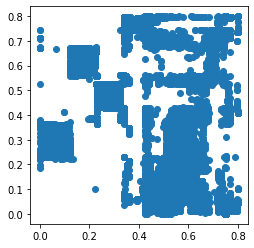

In [ ]:
geo_df.plot()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


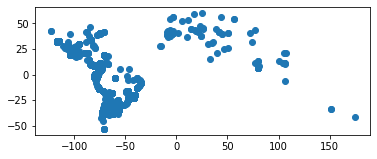

In [ ]:
#Dropoff Coordinates
loc_crs1 = {'init': 'epsg:4326'}
loc_geom1 = [Point(xy) for xy in zip(app_df['dropoff_longitude'], app_df['dropoff_latitude'])]
geo_df1 = gpd.GeoDataFrame(app_df, crs=loc_crs1, geometry=loc_geom1)
geo_df1.plot()

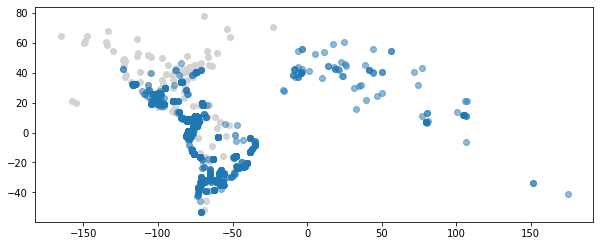

In [ ]:
#Pickup Layoff Transport Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

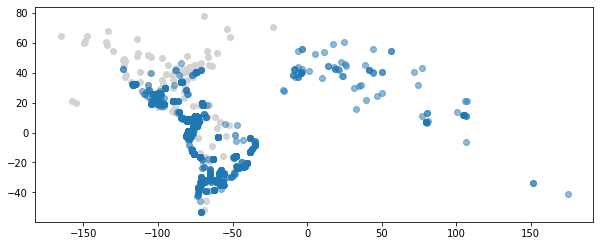

In [ ]:
#Dropoff Layoff Transport Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [ ]:
shape_df1 = gpd.read_file('/content/gis/Americas_Cities.shp')

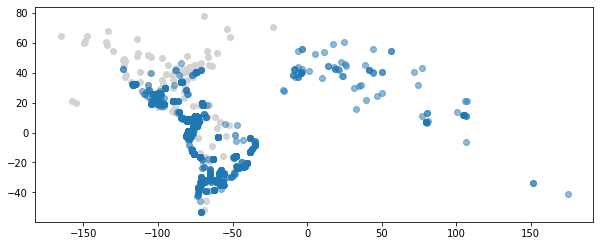

In [ ]:
#Pickup Layoff Traffic Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

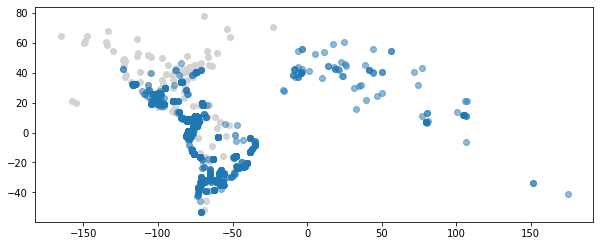

In [ ]:
#Dropoff Layoff Traffic Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [ ]:
# Label Encoder
le = LabelEncoder()

df['vendor_id']= le.fit_transform(df['vendor_id'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,43,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,71,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,71,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,71,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [ ]:
df = df.drop(columns=['id','pickup_datetime','dropoff_datetime'])


In [ ]:
X = df.iloc[:,:-4]
y = df.iloc[:,-2]

In [ ]:
X

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,97,0.632055,0.528947,-78.549447,-0.361363
1,43,0.327804,0.391950,-103.366600,20.686971
2,71,0.140910,0.563280,-100.165737,25.619387
3,71,0.207565,0.590416,-100.491721,25.676294
4,71,0.128881,0.580419,-100.104166,25.643862
...,...,...,...,...,...
90282,97,0.706498,0.552770,-78.550306,-0.256756
90283,10,0.369432,0.762872,-74.050725,4.714622
90284,81,0.089643,0.308893,-99.194622,19.396717
90285,97,0.431407,0.724499,-78.446296,-0.327428


In [ ]:
#Clustering data with tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def k_means_clustering( a1, b1, c1, d1, clusters, steps=100):
    vec_vals = []
    for i in range(len(a1)):
        a = a1[i]
        b = b1[i]
        c = c1[i]
        d = d1[i]
        vec_vals.append([a, b, c, d])
    v_vals = np.array(vec_vals)
    np.random.shuffle(v_vals)    
    
    sess = tf.compat.v1.Session()
    k = clusters
    points = v_vals
    data = tf.constant(points)
    
    # random initial centroids (points shuffled above)
    centroids = tf.Variable(data[:k, :])

    # add k dim to data and n dim to centroids to make matrices compatible
    # for array operations instead of loops
    data_expanded = tf.expand_dims(data, 0)
    centroids_expanded = tf.expand_dims(centroids, 1)

    # computes squared Euclidean distance between every point and every centroid
    # and get closest centroid for each point
    allocations = tf.argmin(tf.reduce_sum(tf.square(data_expanded - centroids_expanded), 2), 0)

    sess.run(tf.global_variables_initializer())
    c = 0 # index of centroid
    tf.equal(allocations, c)
    tf.gather(data, tf.where(tf.equal(allocations, c)))

    means = tf.concat(
        [tf.reduce_mean(
            tf.gather(data,
                      tf.where(tf.equal(allocations, c))), 0) for c in range(k)], 0)

    update_centroids = tf.assign(centroids, means)

    for step in range(steps):
        _, centroid_values, allocation_values = sess.run([update_centroids, centroids, allocations])
        
    clusters_df = pd.DataFrame({a1.name: points[:,0], b1.name: points[:,1], c1.name: points[:,2], d1.name: points[:,3],"cluster": allocation_values})
    # sns.lmplot(a1.name, b1.name, c1.name, d1.name, data=clusters_df, fit_reg=False, size=6, hue="cluster")
    # plt.show()
    print(clusters_df)
    clusters_df.to_csv("ClusteringResult.csv", index=False)
    
Cluster_tf = k_means_clustering(app_df['pickup_latitude'], app_df['pickup_longitude'], app_df['dropoff_latitude'], app_df['dropoff_longitude'], 2)

Cluster_tf

       pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0             0.647366          0.193758         25.770078        -100.379270   
1             0.397573          0.332610         20.640851        -103.397250   
2             0.219754          0.564573         -0.203883         -78.495897   
3             0.403691          0.766173         -2.128558         -79.922036   
4             0.523234          0.322423         21.928355        -102.338248   
...                ...               ...               ...                ...   
90282         0.124533          0.466468         -0.167287         -78.479444   
90283         0.463139          0.241287         21.922311        -102.233390   
90284         0.551153          0.665104         -0.253400         -78.516119   
90285         0.071578          0.719613         -1.255806         -78.629999   
90286         0.646800          0.149641         25.817037        -100.093742   

       cluster  
0         

In [ ]:
#Split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
len(y_train), len(y_test)

(72229, 18058)

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

# Fit and Transform both training and testing data
X_train = feature_scaler.fit_transform(X_train.values)
X_test = feature_scaler.fit_transform(X_test.values)
y_train = label_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = label_scaler.fit_transform(y_test.values.reshape(-1, 1))

In [ ]:
#Regression distance meter with Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
tf.random.set_seed(42)  #first we set random seed
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
history = model.fit(epochs=100, x=X_train, y=y_train,
          validation_data=(X_test, y_test))

Train on 72229 samples, validate on 18058 samples
Epoch 1/100
71232/72229 [============================>.] - ETA: 0s - loss: 0.0321 - mean_absolute_error: 0.0321

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


72229/72229 [==============================] - 3s 41us/sample - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151
Epoch 2/100
72229/72229 [==============================] - 3s 39us/sample - loss: 0.0252 - mean_absolute_error: 0.0252 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 3/100
72229/72229 [==============================] - 3s 40us/sample - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190
Epoch 4/100
72229/72229 [==============================] - 3s 39us/sample - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146
Epoch 5/100
72229/72229 [==============================] - 3s 39us/sample - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145
Epoch 6/100
72229/72229 [==============================] - 3s 39us/sample - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0173 - val_mean_abs

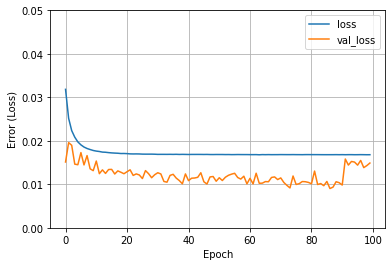

In [ ]:
#Plot lost history
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,0.05])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [ ]:
# Model evaluation on testing dataset
model.evaluate(X_train, y_train)

[0.018694895110209424, 0.018694896]